In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from ydata_profiling import ProfileReport
from sklearn.feature_selection import SelectFromModel


In [3]:
from src.utils import DatabaseManager

db=DatabaseManager()
df=db.execute_query('select * from merge_table',fetch=True)

In [37]:
income=df[df.clusters=='1'].income.mean()

In [41]:
((55000-income)/income)*100

-29.0944371959651

In [33]:
df.income.mean()-40000

12247.251353790612

In [44]:
result = df.groupby('clusters')['income'].agg(
    mean='mean',
    median='median',
    min='min',
    max='max'
).reset_index()

result

,clusters,mean,median,min,max
0,0,30923.380414,30368.0,1730.0,66503.0
1,1,77567.961983,76045.0,44953.0,666666.0
2,2,50704.685009,51651.0,6835.0,94871.0
3,3,46491.153707,46344.0,4023.0,83891.0


<Axes: xlabel='income', ylabel='Count'>

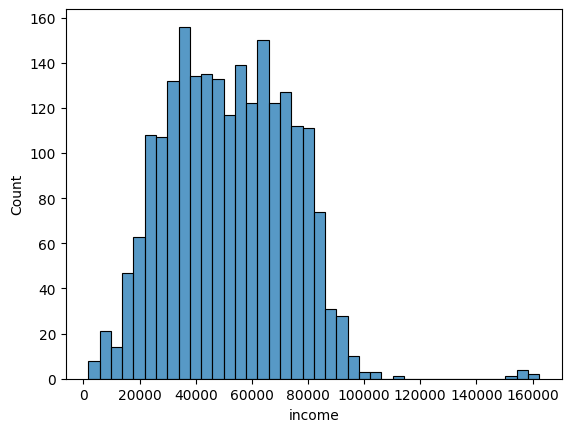

In [15]:
import seaborn as sns
sns.histplot(df.income[df.income<600000],bins=40)